In [7]:

from __future__ import print_function
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import ekg_data
import learn_utils
%matplotlib inline

WINDOW_LEN = 32

def get_windowed_segments(data, window):
    """
    Populate a list of all segments seen in the input data.  Apply a window to
    each segment so that they can be added together even if slightly
    overlapping, enabling later reconstruction.
    """
    step = 2
    windowed_segments = []
    segments = learn_utils.sliding_chunker(
        data,
        window_len=len(window),
        slide_len=step
    )
    for segment in segments:
        segment *= window
        windowed_segments.append(segment)
    return windowed_segments
import warnings
warnings.filterwarnings('ignore')
   



In [25]:

n_samples = 8192
print("Reading data...")
    
data = ekg_data.read_ekg_data('a02.dat')[0:n_samples]

window_rads = np.linspace(0, np.pi, WINDOW_LEN)
window = np.sin(window_rads)**2
print("Windowing data...")
windowed_segments = get_windowed_segments(data, window)

print("Clustering...")
clusterer = KMeans(n_clusters=150)
clusterer.fit(windowed_segments)

print("Reconstructing...")
print(data.shape, window.shape, clusterer)
reconstruction = learn_utils.reconstruct(data, window, clusterer)


Reading data...
Windowing data...
Clustering...
Reconstructing...
(8192,) (32,) KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=150, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Maximum reconstruction error is 111.2


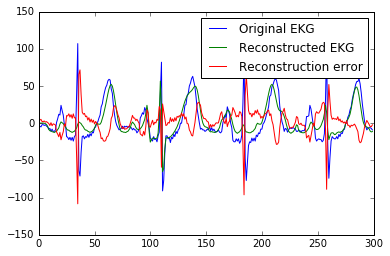

In [24]:
error = reconstruction - data
print("Maximum reconstruction error is %.1f" % max(error))

plt.figure()
n_plot_samples = 300
plt.plot(data[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction error")
plt.legend()
plt.show()

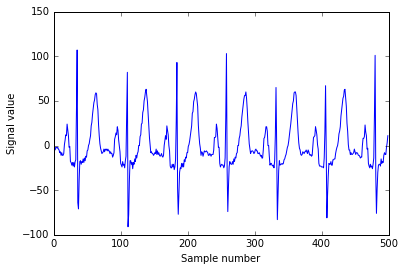

In [13]:
# IPython 'magic' command to set the matplotlib backend to display
# in the notebook

n_samples_to_plot = 500
plt.plot(data[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

Produced 4081 waveform segments


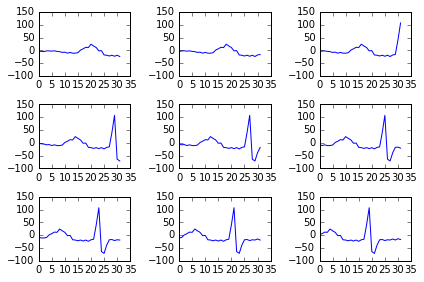

In [33]:
segment_len = 32
slide_len = 2

segments = []
for start_pos in range(0, len(data), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(data[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))
learn_utils.plot_waves(segments, step=1)

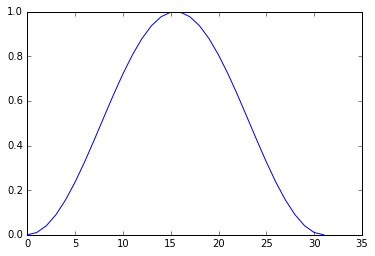

4081


In [39]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)
print(len(windowed_segments))

511


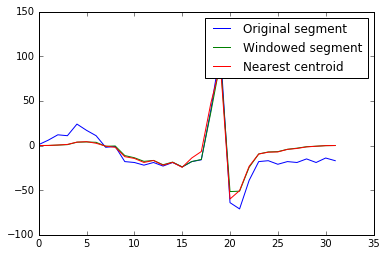

In [40]:
slide_len = int(segment_len/2)
test_segments = learn_utils.sliding_chunker(
    data,
    window_len=segment_len,
    slide_len=slide_len
)
print(len(test_segments))
centroids = clusterer.cluster_centers_

segment = np.copy(test_segments[1])
# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * window
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed
nearest_centroid_idx = clusterer.predict(windowed_segment)[0]
nearest_centroid = np.copy(centroids[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()